In [1]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-03-28 09:50:01.990835: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 09:50:02.030743: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 09:50:02.030776: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 09:50:02.031917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-28 09:50:02.038771: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-28 09:50:02.039266: I tensorflow/core/platform/cpu_feature_guard.cc:1

First of all, let's define the paths where our taining and validation datasets are stored:

In [2]:
train_dir = '/home/ocanal/Desktop/UriCanal/master_machine_learning/advanced_machine_learning/project1_image_clasification/train'
validation_dir = '/home/ocanal/Desktop/UriCanal/master_machine_learning/advanced_machine_learning/project1_image_clasification/validation'

First of all let's define the image size and the batch size. In this case the images have a size of 32x32, Each batch will also contain 32 samples

In [3]:
# Define the image size and batch size
image_size = (32, 32)
batch_size = 32

This is a utility in Keras that helps with data augmentation and preprocessing of images during the training process:

rescale=1./255: Rescales the pixel values of the images to be between 0 and 1. This is a standard preprocessing step for neural networks, as it helps in training stability.
rotation_range=15: Randomly rotates the images by up to 15 degrees.
width_shift_range=0.1: Randomly shifts the width of the images by up to 10% of the total width.
height_shift_range=0.1: Randomly shifts the height of the images by up to 10% of the total height.
shear_range=0.2: Applies shearing transformations (distorts the shape of the image along a specified axis. This results in a "tilted" effect where the image is shifted along one axis relative to the other).
zoom_range=0.2: Randomly zooms into the images by up to 20%.
horizontal_flip=True: Randomly flips the images horizontally.
fill_mode='nearest': When new pixels are created due to transformations like rotation or width/height shifting, this mode determines how those pixels are filled in. 'nearest' means they will be filled with the nearest pixel value.

In [4]:
# Creating a Dataset for the Training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

This method generates batches of augmented data from image files in a directory.

In [5]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 10 classes.


 This is for the validation generator. Here, we only want to rescale the pixel values, without augmenting the validation data. This ensures consistency in preprocessing between training and validation.

In [6]:

# Creating a Dataset for the Validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.


# Model Architecture
Input Shape: Images are expected to be 32x32 pixels with 3 color channels (RGB).
Layers:
- Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)): Convolutional layer with 32 filters, each 3x3 in size, using ReLU activation.
- BatchNormalization(): Normalizes the activations of the previous layer at each batch.
- MaxPooling2D((2, 2)): Max pooling layer with a 2x2 pool size.
- Conv2D(64, (3, 3), activation='relu'): Convolutional layer with 64 filters, each 3x3 in size, using ReLU activation.
- BatchNormalization(): Normalization.
- MaxPooling2D((2, 2)): Max pooling.
- Conv2D(128, (3, 3), activation='relu'): Convolutional layer with 128 filters, each 3x3 in size, using ReLU activation.
- BatchNormalization(): Normalization.
- MaxPooling2D((2, 2)): Max pooling.
- Flatten(): Flattens the input.
- Dropout(0.5): Dropout layer with a rate of 0.5, to prevent overfitting.
- Dense(512, activation='relu'): Fully connected (dense) layer with 512 units and ReLU activation.
- Dropout(0.5): Another dropout layer.
- Dense(10, activation='softmax'): Output layer with 10 units as we have 10 categories using softmax activation for multi-class classification.

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

In [12]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 107s 85ms/step - loss: 1.8879 - accuracy: 0.3449 - val_loss: 1.6719 - val_accuracy: 0.4040
Epoch 2/50
1250/1250 [==============================] - 108s 87ms/step - loss: 1.5540 - accuracy: 0.4400 - val_loss: 1.3513 - val_accuracy: 0.5282
Epoch 3/50
1250/1250 [==============================] - 110s 88ms/step - loss: 1.4615 - accuracy: 0.4779 - val_loss: 1.2408 - val_accuracy: 0.5491
Epoch 4/50
1250/1250 [==============================] - 111s 89ms/step - loss: 1.3846 - accuracy: 0.5070 - val_loss: 1.2189 - val_accuracy: 0.5589
Epoch 5/50
1250/1250 [==============================] - 107s 86ms/step - loss: 1.3342 - accuracy: 0.5275 - val_loss: 1.0758 - val_accuracy: 0.6250
Epoch 6/50
1250/1250 [==============================] - 108s 86ms/step - loss: 1.2953 - accuracy: 0.5427 - val_loss: 1.1288 - val_accuracy: 0.6033
Epoch 7/50
1250/1250 [==============================] - 107s 86ms/step - loss: 1.2505 - accuracy: 0.5608 - val_loss: 1

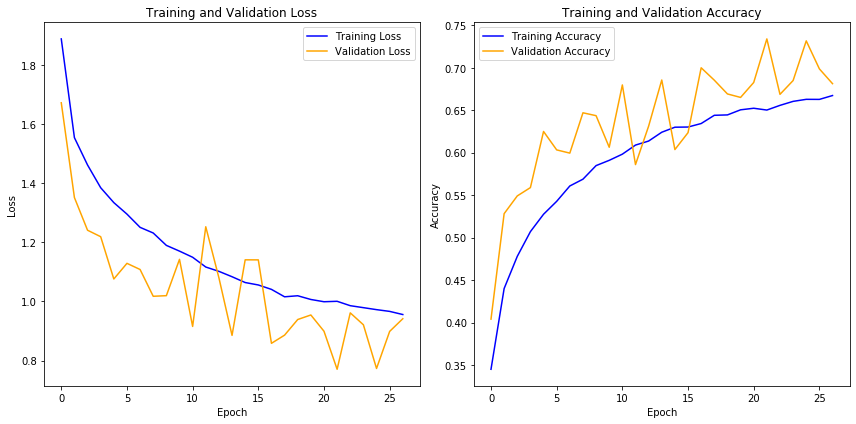

In [13]:
import matplotlib.pyplot as plt

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


We notice an uncommon trend where the validation accuracy surpasses the training accuracy. This anomaly may be attributed to the data augmentation process, which alters the training dataset without affecting the validation dataset. This suggests that we might be employing an aggressive data augmentation strategy, significantly modifying the training data and consequently resulting in lower accuracy during training compared to validation. Let's try it with a less aggressive data augmentation:

In [8]:
# Creating a less aggressive Dataset for the Training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Reduced rotation range
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 10 classes.


We will also increase the patience of the early stopping to ensure that we have arribed to the pleateau of accuracy or if we could improve it a little bit more:

In [9]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model with data augmentation
history = model.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=len(train_generator),
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    callbacks=[early_stopping])

Epoch 1/50
1250/1250 [==============================] - 45s 35ms/step - loss: 1.8636 - accuracy: 0.3527 - val_loss: 1.6612 - val_accuracy: 0.4099
Epoch 2/50
1250/1250 [==============================] - 46s 37ms/step - loss: 1.5135 - accuracy: 0.4546 - val_loss: 1.7126 - val_accuracy: 0.4011
Epoch 3/50
1250/1250 [==============================] - 46s 37ms/step - loss: 1.4068 - accuracy: 0.4988 - val_loss: 1.4279 - val_accuracy: 0.4994
Epoch 4/50
1250/1250 [==============================] - 43s 34ms/step - loss: 1.3386 - accuracy: 0.5250 - val_loss: 1.2004 - val_accuracy: 0.5624
Epoch 5/50
1250/1250 [==============================] - 45s 36ms/step - loss: 1.2800 - accuracy: 0.5465 - val_loss: 1.1910 - val_accuracy: 0.5904
Epoch 6/50
1250/1250 [==============================] - 47s 38ms/step - loss: 1.2404 - accuracy: 0.5606 - val_loss: 1.1166 - val_accuracy: 0.6036
Epoch 7/50
1250/1250 [==============================] - 47s 38ms/step - loss: 1.1963 - accuracy: 0.5774 - val_loss: 1.0650 -

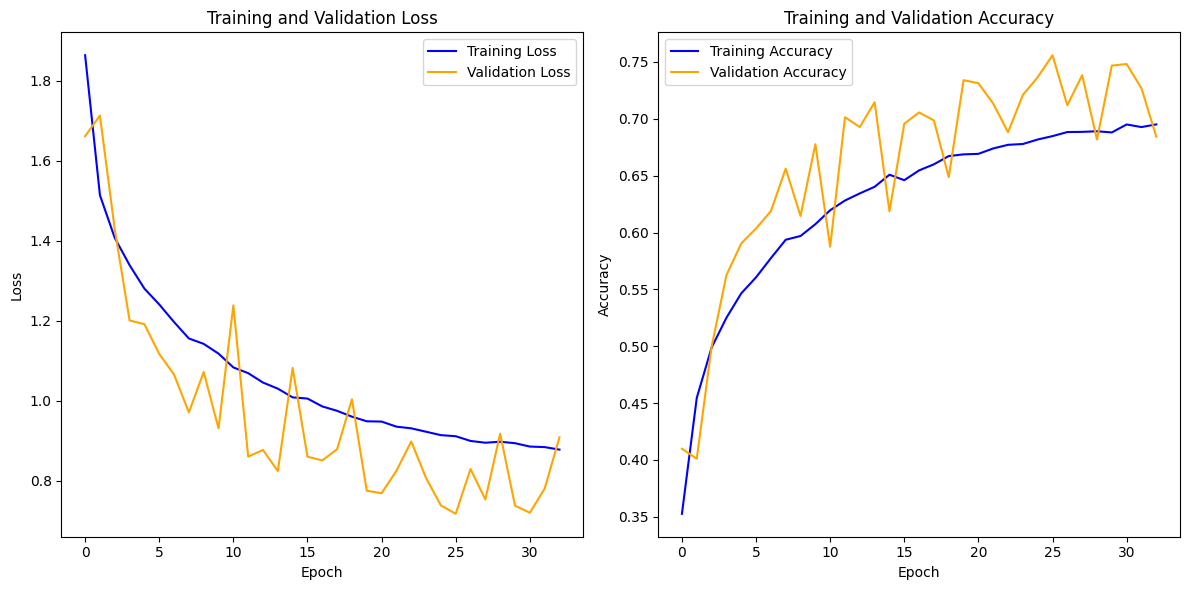

In [10]:
# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
def step_decay(epoch):
    initial_lr = 0.001  # Initial learning rate
    drop = 0.5          # Factor by which the LR drops
    epochs_drop = 10    # Drop LR every 10 epochs
    lr = initial_lr * drop**(np.floor(epoch / epochs_drop))
    return lr


# Compile the model with initial learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define learning rate scheduler
lr_scheduler = LearningRateScheduler(step_decay, verbose=1)

# Train the model with learning rate schedule
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    callbacks=[lr_scheduler])

# TRANSFER LEARNING

In [11]:
from tensorflow.keras.applications import VGG16


In [13]:
# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Create new model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(validation_generator))

Epoch 1/10
1250/1250 [==============================] - 254s 202ms/step - loss: 1.6167 - accuracy: 0.4272 - val_loss: 1.3109 - val_accuracy: 0.5374
Epoch 2/10
1250/1250 [==============================] - 286s 228ms/step - loss: 1.4329 - accuracy: 0.4945 - val_loss: 1.2544 - val_accuracy: 0.5588
Epoch 3/10
1250/1250 [==============================] - 298s 238ms/step - loss: 1.3842 - accuracy: 0.5164 - val_loss: 1.2215 - val_accuracy: 0.5658
Epoch 4/10
1250/1250 [==============================] - 291s 233ms/step - loss: 1.3493 - accuracy: 0.5250 - val_loss: 1.2153 - val_accuracy: 0.5697
Epoch 5/10
1250/1250 [==============================] - 327s 262ms/step - loss: 1.3304 - accuracy: 0.5306 - val_loss: 1.1983 - val_accuracy: 0.5772
Epoch 6/10
1250/1250 [==============================] - 309s 247ms/step - loss: 1.3148 - accuracy: 0.5370 - val_loss: 1.1853 - val_accuracy: 0.5867
Epoch 7/10
1250/1250 [==============================] - 327s 262ms/step - loss: 1.2937 - accuracy: 0.5439 - val_

Let's unfreeze the last layers to apply fine-tunning

In [ ]:
# Load pre-trained model (e.g., VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Unfreeze some top layers for fine-tuning
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Add new classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # num_classes is the number of your classes
])

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    steps_per_epoch=len(train_generator),
                    validation_steps=len(validation_generator))

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)